In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
def plot_measures(values,labels,titulo, x_rotation, fig_size=(8,8)):
        
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    rects1 = ax.bar(ind, values, width,color='SkyBlue')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conteos')
    ax.set_title(titulo)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels,rotation = x_rotation)
    
    autolabel(rects1,ax, "center")
    plt.show()
    
def autolabel(rects, ax,xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                height, ha=ha[xpos], va='bottom')    

In [3]:
data_dir = os.path.join('data xm','Precio','Precio Oferta kWh')
data_list = list()
real_columns_names = ['Fecha','Recurso','Código Agente','Precio de Oferta Ideal',
                      'Precio de Oferta de Despacho','Precio de Oferta Declarado']

In [4]:
shape_count = 0
for root, dirs, files in os.walk(data_dir, topdown=False):
    for file in files:
        f = pd.read_excel(os.path.join(root,file))
        f.columns = real_columns_names
        shape_count += f.shape[0]
        data_list.append(f)
        print(os.path.join(root,file),f.shape)

data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2000.xlsx (20095, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2001.xlsx (20317, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2002.xlsx (20491, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2003.xlsx (20001, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2004.xlsx (18740, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2005.xlsx (18642, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2006.xlsx (18406, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2007.xlsx (18188, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2008.xlsx (17820, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2009.xlsx (17885, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2010.xlsx (17823, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2011.xlsx (17569, 6)
data xm\Precio\Precio Oferta kWh\Precio_Oferta_($kWh)_2012.xlsx (17903, 6)
data xm\Precio\Precio Ofe

In [5]:
full_data = pd.concat(data_list)

In [6]:
assert shape_count == full_data.shape[0], 'No coinciden las dimensiones'

In [7]:
full_data.dropna(inplace=True,how='all')

In [8]:
full_data.shape

(386547, 6)

In [9]:
full_data.columns

Index(['Fecha', 'Recurso', 'Código Agente', 'Precio de Oferta Ideal',
       'Precio de Oferta de Despacho', 'Precio de Oferta Declarado'],
      dtype='object')

# Recursos

In [10]:
datos_copy = full_data.copy()

In [11]:
recursos_unicos = pd.unique(datos_copy['Recurso'])

In [12]:
'Cantidad de Recursos Unicos: {}'.format(len(recursos_unicos))

'Cantidad de Recursos Unicos: 86'

In [13]:
recursos_unicos_conteo = datos_copy.groupby('Recurso')['Fecha'].count()
recursos_unicos_conteo = recursos_unicos_conteo.sort_values(ascending=False)

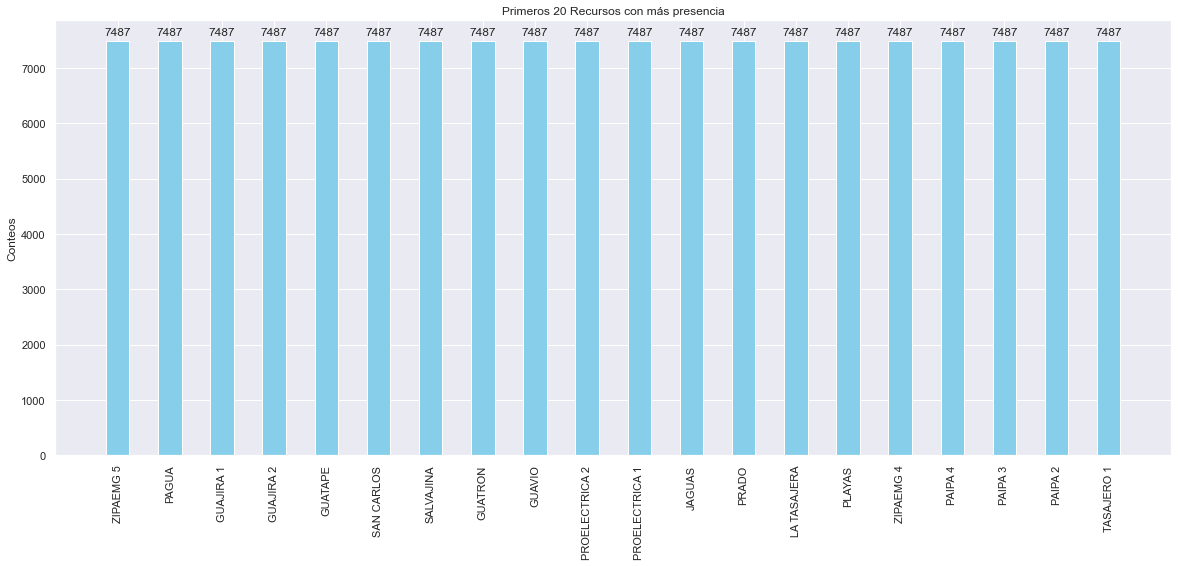

In [14]:
recursos_unicos_primeros = recursos_unicos_conteo[:20]
values = recursos_unicos_primeros.values
labels = recursos_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

### Contamos cuantos recursos unicos hay juntando aquellos que tienen los nombres numerados

In [15]:
def agrupar_por_fecha_recurso(grupo):
    codigo_agente = grupo['Código Agente'].tolist()[0]
    
    columnas_precios = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    columnas_precios_suma = grupo[columnas_precios].sum()
    
    S1 = pd.Series([codigo_agente],index=['Código Agente'])
    S1 = S1.append(columnas_precios_suma)
    
    return S1

In [16]:
datos_copy['Recurso'] = datos_copy['Recurso'].str.replace('\d+', '')
datos_copy['Recurso'] = datos_copy['Recurso'].str.replace(r'(?=\b[MDCLXVI]+\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})', '')
datos_copy['Recurso'] = datos_copy['Recurso'].map(lambda x: x.strip(' '))

In [17]:
recursos_unicos = pd.unique(datos_copy['Recurso'])
'Cantidad de Recursos Unicos: {}'.format(len(recursos_unicos))

'Cantidad de Recursos Unicos: 62'

In [18]:
recursos_unicos_conteo = datos_copy.groupby('Recurso')['Fecha'].count()
recursos_unicos_conteo = recursos_unicos_conteo.sort_values(ascending=False)

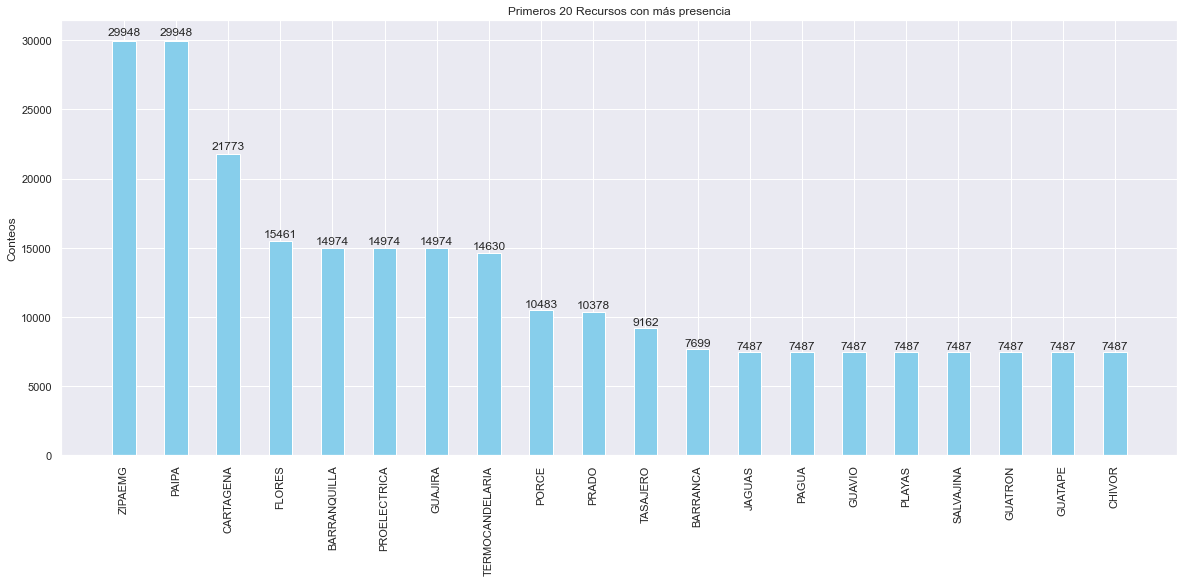

In [19]:
recursos_unicos_primeros = recursos_unicos_conteo[:20]
values = recursos_unicos_primeros.values
labels = recursos_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

In [20]:
datos_agrupados = datos_copy.groupby(['Fecha','Recurso']).apply(agrupar_por_fecha_recurso)

In [27]:
datos_agrupados.shape

(275156, 6)

In [21]:
datos_agrupados = datos_agrupados.reset_index()

In [23]:
datos_agrupados['Precio de Oferta Ideal'].fillna(value=0, inplace=True)
datos_agrupados['Precio de Oferta de Despacho'].fillna(value=0, inplace=True)
datos_agrupados['Precio de Oferta Declarado'].fillna(value=0, inplace=True)

In [24]:
fecha_idx = datos_agrupados[datos_agrupados['Fecha'] == 'Fecha'].index
datos_agrupados = datos_agrupados.drop(index=fecha_idx)

In [25]:
def dividir_guardar_dataset(dataset,dataset_path,dataset_name):
    maximas_filas_excel = 1048576
    filas_dataset = dataset.shape[0]
    divisiones = 1
    
    if filas_dataset > maximas_filas_excel:
        divisiones = math.ceil(filas_dataset/maximas_filas_excel)
        
    lista_dataset = np.array_split(dataset, divisiones)
    for idx,df in enumerate(lista_dataset):
        df.to_excel(os.path.join(dataset_path,'{}_{}.xlsx'.format(dataset_name,idx)))
        print('---> Tamaño División: {}'.format(df.shape))

In [26]:
dataset_path = os.path.join('data series','Precio','Oferta')

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

dividir_guardar_dataset(datos_agrupados,dataset_path,dataset_name='Oferta')

---> Tamaño División: (275156, 6)


# Visualización de los datos

In [28]:
def obtener_datos_por_recurso(data,nombre_recurso):
    
    data['Fecha'] =  pd.to_datetime(data['Fecha'], format='%Y-%m-%d')
    
    datos_recurso = data[data['Recurso'] == nombre_recurso]
    datos_recurso = datos_recurso.copy()

    datos_recurso = datos_recurso.set_index('Fecha')
    
    datos_recurso['Año'] = datos_recurso.index.year
    datos_recurso['Mes'] = datos_recurso.index.month
    datos_recurso['Dia'] = datos_recurso.index.day_name()
    
    return datos_recurso

In [29]:
def grafico_comportamiento_variables(datos):
    cols_plot = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    nombre_graficas = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(20, 9), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [30]:
def grafico_comportamiento_variables_por_mes(datos):
    fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
    for name, ax in zip(['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado'], axes):
        sns.boxplot(data=datos, x='Mes', y=name, ax=ax)
        ax.set_title(name)
        
        if ax != axes[-1]:
            ax.set_xlabel('')

In [31]:
def grafico_filtrado_fecha_variable(datos,fecha_min,fecha_max,variable):
    ax = datos.loc[fecha_min:fecha_max, variable].plot(marker='o',linestyle='-',figsize=(15, 9))
    ax.set_ylabel(variable);

In [32]:
def grafico_resampling_rolling_window(datos,fecha_min,fecha_max,variable):
    cols_plot = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    datos_7d = datos[cols_plot].rolling(7, center=True).mean()

    fig, ax = plt.subplots()

    ax.plot(datos.loc[fecha_min:fecha_max, variable],
    marker='.', linestyle='-', linewidth=0.5, label='Diaria')

    ax.plot(datos_7d.loc[fecha_min:fecha_max, variable],linestyle='-', label='Media Movil 7-Días')

    ax.set_ylabel(variable)
    ax.legend();

In [33]:
dataset = datos_agrupados.copy()

In [34]:
recurso = obtener_datos_por_recurso(dataset,nombre_recurso='PORCE')

### Gráfico comportamiento variables

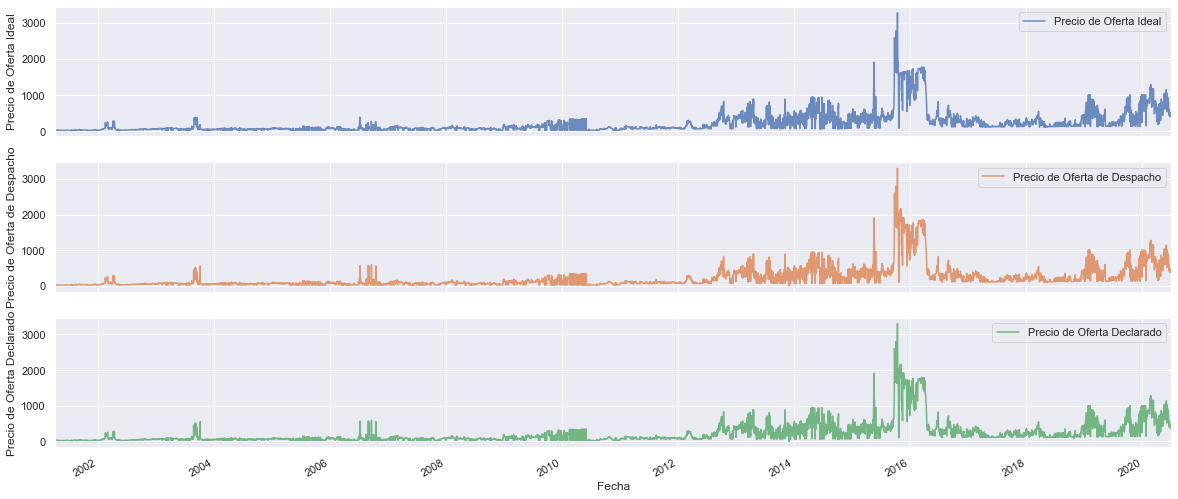

In [35]:
grafico_comportamiento_variables(recurso)

### Comportamiento variables por mes

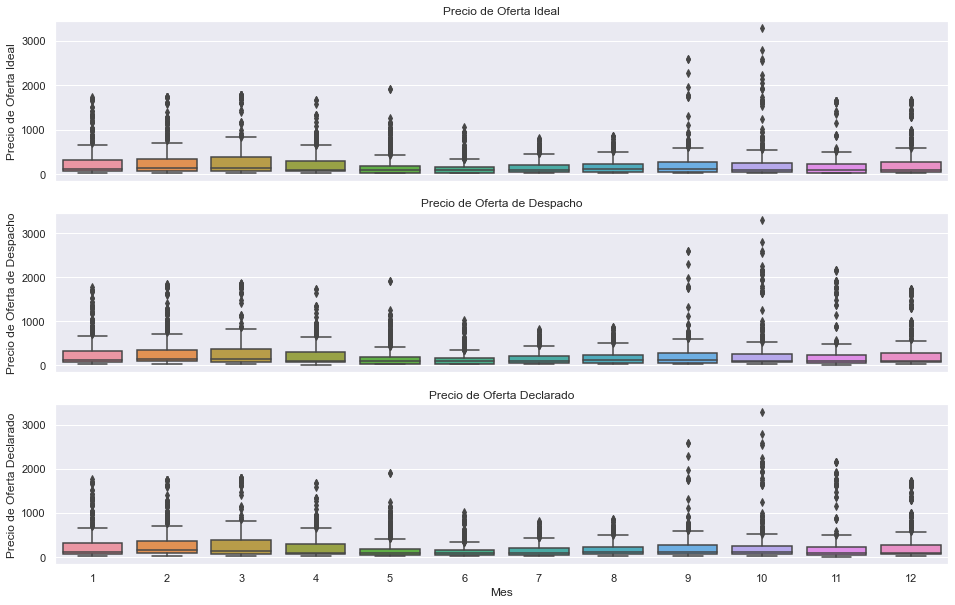

In [36]:
grafico_comportamiento_variables_por_mes(recurso)

In [37]:
'Fecha Mínima {} - Fecha Máxima {}'.format(recurso.index.min(),recurso.index.max())

'Fecha Mínima 2001-04-08 00:00:00 - Fecha Máxima 2020-06-30 00:00:00'

### Datos estación filtrado por Variable y Fecha

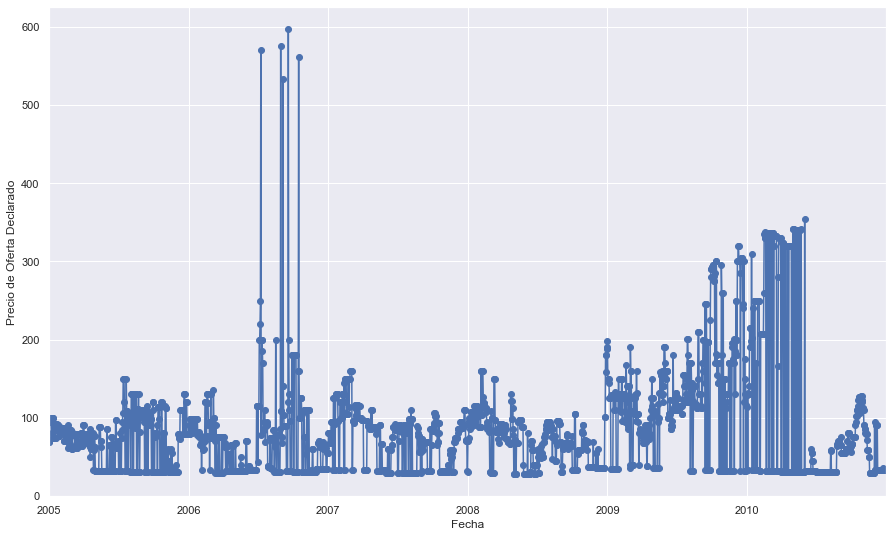

In [38]:
grafico_filtrado_fecha_variable(datos=recurso,fecha_min='2005-01',fecha_max='2010-12',variable='Precio de Oferta Declarado')

### Remuestreo de los datos filtrado por Variable y Fecha

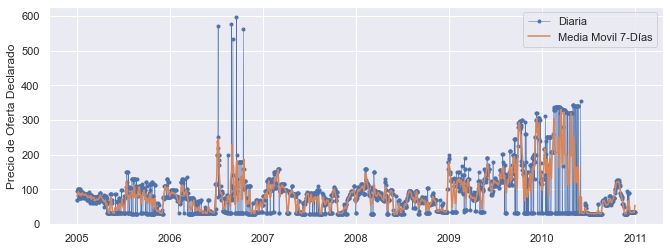

In [39]:
grafico_resampling_rolling_window(datos=recurso,fecha_min='2005-01',fecha_max='2010-12',variable='Precio de Oferta Declarado')